# Risk Parity Model

In [177]:
# Import modules.
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
warnings.filterwarnings('ignore')

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
today = date.today()
last_month = today - datetime.timedelta(days=365*2)

start = last_month.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU"]
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  11 of 11 completed


'2021-05-03'

'2023-05-03'

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2021-05-04,1.0916%,-0.9016%,0.0591%,0.7958%,0.4370%,-1.7946%,-0.5132%,-0.6112%,-0.3748%,0.1059%,-1.0445%
2021-05-05,1.2676%,-0.1950%,3.2296%,0.8168%,0.0967%,-0.2412%,-0.0716%,-1.4664%,-1.6852%,0.1791%,-0.3121%
2021-05-06,0.8461%,1.1720%,0.5151%,1.4853%,0.6955%,1.0038%,1.2905%,0.4801%,0.7652%,0.1300%,0.2163%
2021-05-07,0.9884%,0.7594%,1.7840%,0.5322%,1.0551%,0.8560%,0.0000%,1.2184%,0.3038%,0.6898%,0.8975%
2021-05-10,-0.4438%,-1.9162%,0.0373%,-0.0794%,0.0949%,-2.5247%,0.7644%,0.4484%,1.0145%,0.1290%,-1.7791%
...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,-1.1825%,-1.0576%,-1.3348%,-0.9518%,-1.8891%,1.4864%,-0.7815%,-0.8166%,-2.3462%,-1.4220%,-0.5124%
2023-04-27,1.3622%,5.8079%,0.3592%,1.6119%,1.9769%,2.1217%,1.1158%,2.4149%,1.2013%,0.5239%,2.6376%
2023-04-28,1.1680%,0.8587%,1.5508%,1.1897%,0.9693%,1.0857%,0.5323%,1.1522%,-0.1448%,0.8535%,0.2577%


In [185]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 100 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
weights,0.0000%,0.0000%,8.5596%,0.0000%,0.0000%,0.0000%,57.0175%,0.0000%,2.7803%,31.6426%,0.0000%


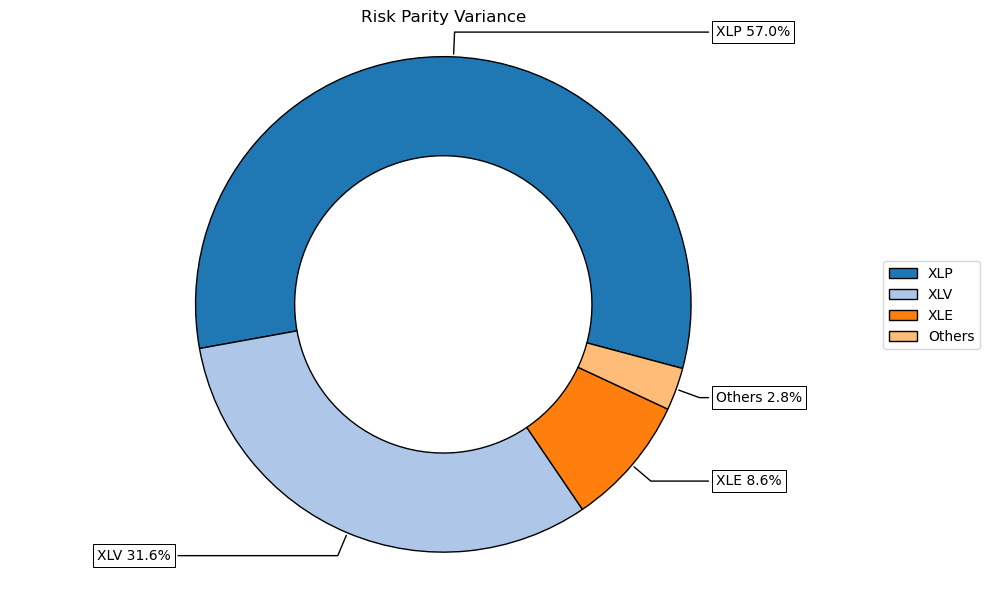

In [183]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w,
                 title='Risk Parity Variance',
                 others=0.05,
                 nrow=25,
                 cmap = "tab20",
                 height=6,
                 width=10,
                 ax=None)

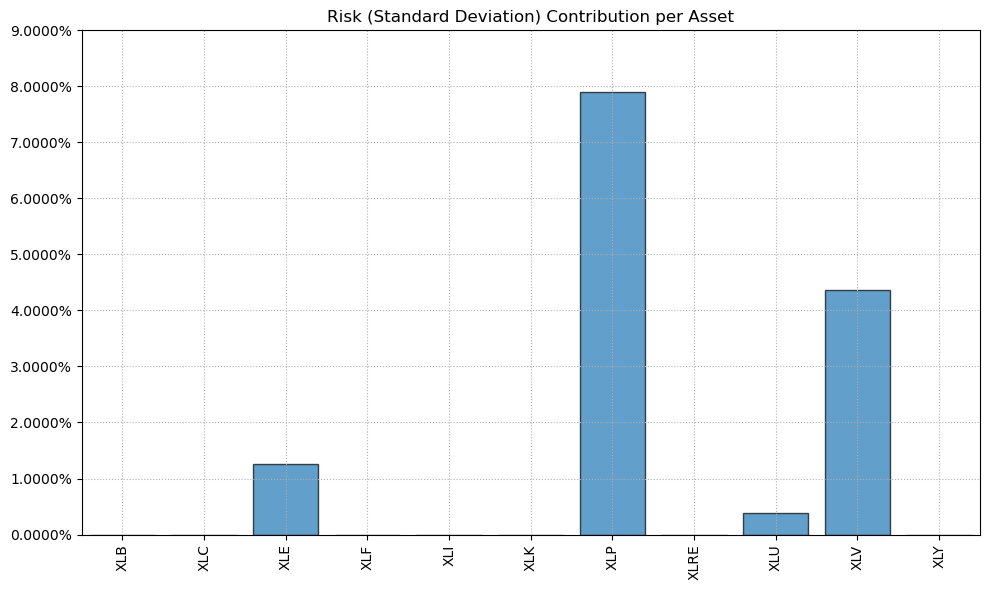

In [186]:
# Plotting the risk composition of the portfolio

ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)